In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Problem 1 : Predicting SalePrice using GrLivArea

Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train 
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.

Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

Hints and Pointers

o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.

o If you obtain the coefficients for the regression line (intercept and coef), it should be easy to plot the line too.

o Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors.

scikit train_test_split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def compare(x ,y , df):
    
    #x=pd.DataFrame(housedata[x])
    #y=pd.DataFrame(housedata[y])
    x=housedata[[x]]
    y=housedata[[y]]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    #x_train, y_train=train_test_split(x,y, test_size=0.8)
    #x_test, y_test=train_test_split(x,y, test_size=0.2)
    
    print("Train Set :", x_train, y_train)
    print("Test Set  :", x_test, y_test)
    
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    
    #total=axHP +b
    
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    y_train_pred = linreg.predict(x_train)

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(x_train, y_train)
    plt.scatter(x_train, y_train_pred, color = "r")
    plt.show()
    
    y_test_pred = linreg.predict(x_test)

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(x_test, y_test)
    plt.scatter(x_test, y_test_pred, color = "g")
    plt.show()
    
    print("Goodness of fit of the model")
    
    print("train data")
    print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
    mse = mean_sq_err(y_train, y_train_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
    print("test data")
    print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
    
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))



Train Set :       GrLivArea
120         988
1424       1344
1387       2526
999        1208
1116       1419
...         ...
795        1564
674        1136
779        1004
628        2080
853        1445

[1168 rows x 1 columns]       SalePrice
120      180000
1424     144000
1387     136000
999      206000
1116     184100
...         ...
795      171000
674      140000
779      135000
628      135000
853      158000

[1168 rows x 1 columns]
Test Set  :       GrLivArea
41         1328
368        1268
428        1208
741         912
1384       1258
...         ...
51         1176
1066       1571
1193       1224
1073       1426
268         778

[292 rows x 1 columns]       SalePrice
41       170000
368      132000
428      195400
741      142000
1384     105000
...         ...
51       114500
1066     178000
1193     165000
1073     159500
268      120500

[292 rows x 1 columns]
Intercept 	: b =  [16459.09591792]
Coefficients 	: a =  [[108.52517565]]


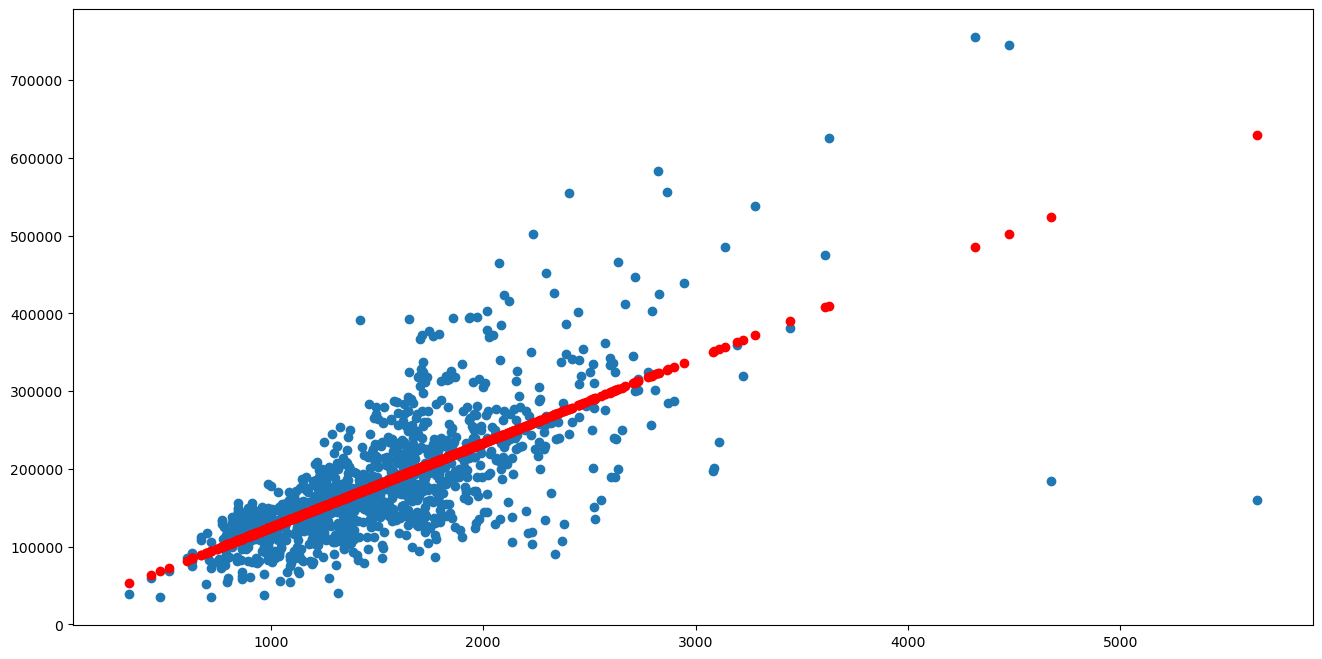

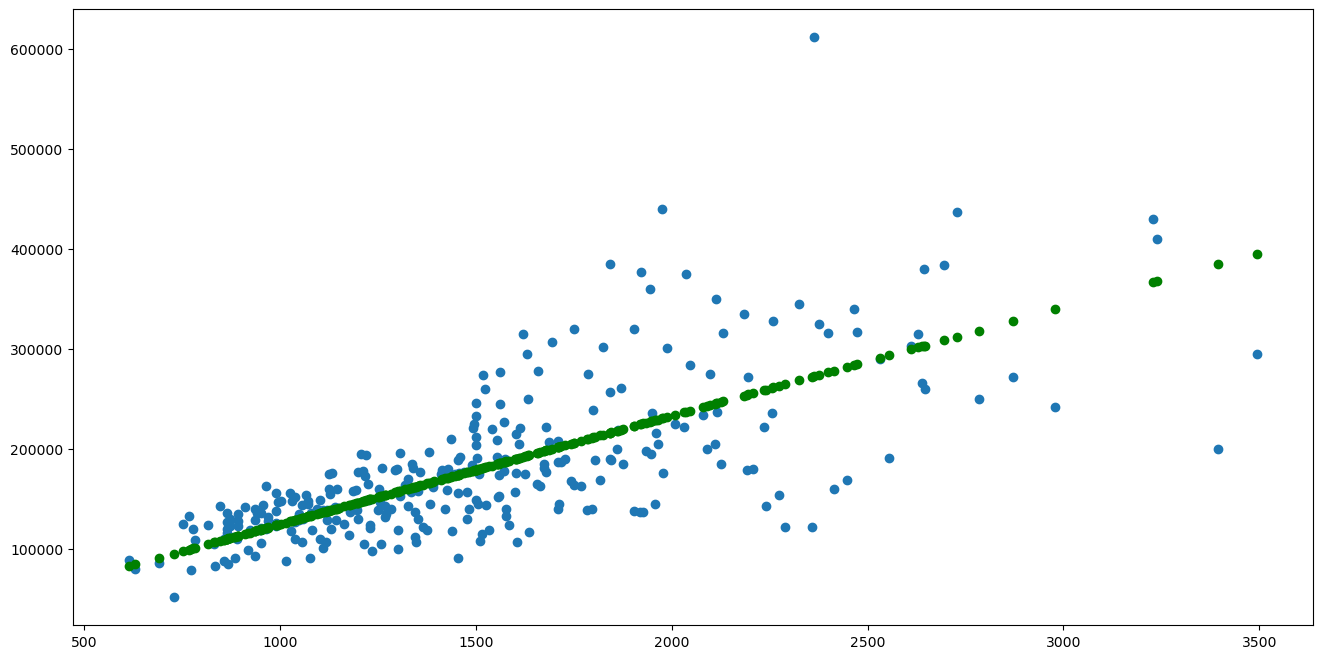

Goodness of fit of the model
train data
Explained Variance (R^2) 	: 0.5032821506323456
Mean Squared Error (MSE) 	: 3194595700.2186193
Root Mean Squared Error (RMSE) 	: 56520.75459703824
test data
Explained Variance (R^2) 	: 0.4966596234696289
Mean Squared Error (MSE) 	: 2923517552.0985107
Root Mean Squared Error (RMSE) 	: 54069.562159300964


In [3]:
compare('GrLivArea', 'SalePrice' , housedata)

# Problem 2 : Predicting SalePrice using Other Variables
Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.
Hints and Pointers

o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.

o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset.

Train Set :       TotalBsmtSF
231          1462
860           912
812           540
502          1214
128           660
...           ...
865          1002
412          1470
764          1494
1232            0
1433          936

[1168 rows x 1 columns]       SalePrice
231      403000
860      189950
812       55993
502      140000
128      155000
...         ...
865      148500
412      222000
764      270000
1232     101800
1433     186500

[1168 rows x 1 columns]
Test Set  :       TotalBsmtSF
900           858
1161         1296
957          1057
1243         2076
312           793
...           ...
874           676
6            1686
704          1473
1430          732
1067          780

[292 rows x 1 columns]       SalePrice
900      110000
1161     224000
957      132000
1243     465000
312      119900
...         ...
874       66500
6        307000
704      213000
1430     192140
1067     167900

[292 rows x 1 columns]
Intercept 	: b =  [57870.05698486]
Coefficients 	: a =  [[115.

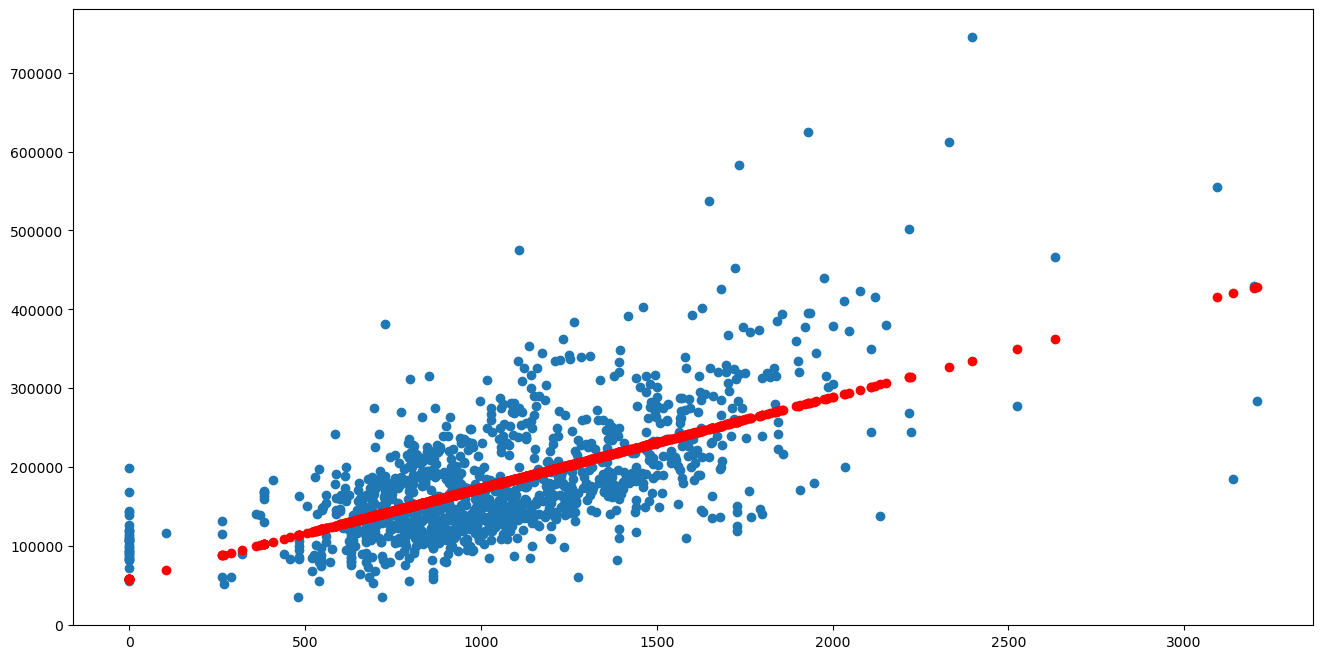

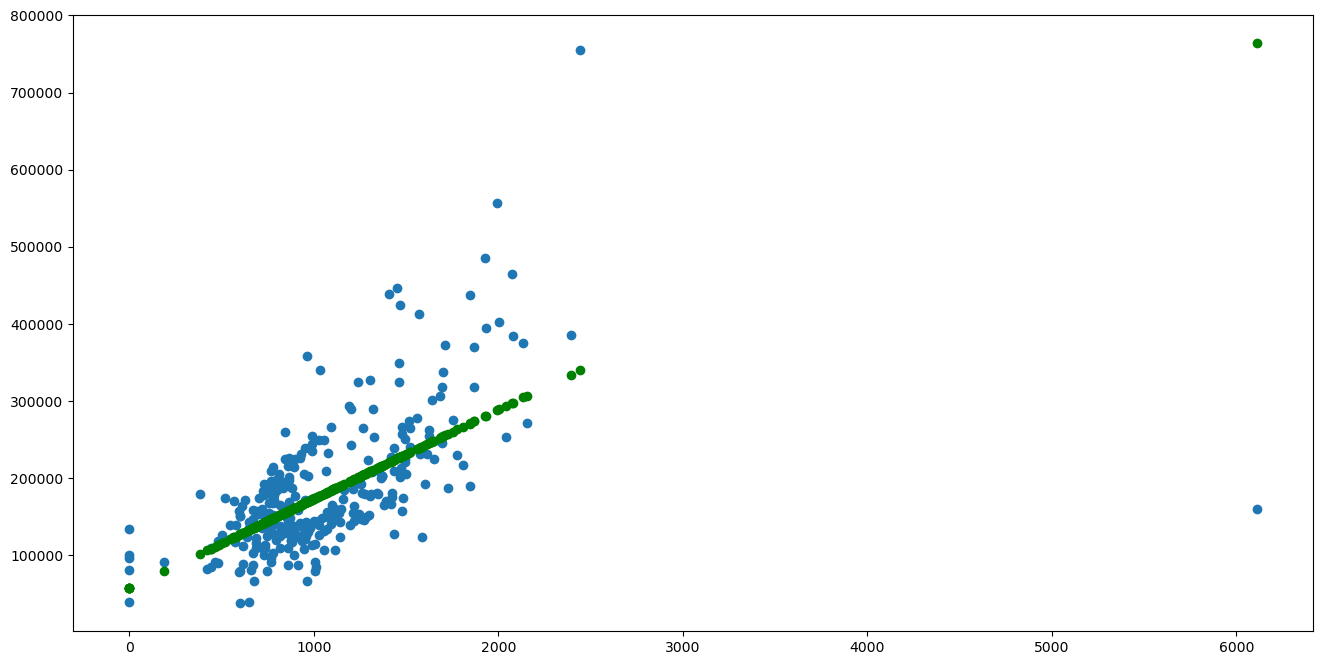

Goodness of fit of the model
train data
Explained Variance (R^2) 	: 0.3954085917551551
Mean Squared Error (MSE) 	: 3580837774.7227902
Root Mean Squared Error (RMSE) 	: 59840.10172720957
test data
Explained Variance (R^2) 	: 0.3132575419396102
Mean Squared Error (MSE) 	: 5361354493.405603
Root Mean Squared Error (RMSE) 	: 73221.27077158388


In [4]:
compare('TotalBsmtSF', 'SalePrice' , housedata)

Train Set :       GarageArea
1355         487
127            0
887          300
431            0
1288         499
...          ...
1178         186
57           565
52           516
788          281
1227         576

[1168 rows x 1 columns]       SalePrice
1355     170000
127       87000
887      135500
431       79900
1288     278000
...         ...
1178     154900
57       196500
52       110000
788      107900
1227     147000

[1168 rows x 1 columns]
Test Set  :       GarageArea
151          866
1131           0
1206         384
609          261
664         1134
...          ...
461          576
743          480
1023         437
554          871
789          444

[292 rows x 1 columns]       SalePrice
151      372402
1131      93500
1206     107000
609      118500
664      423000
...         ...
461      155000
743      175000
1023     191000
554      284000
789      187500

[292 rows x 1 columns]
Intercept 	: b =  [74151.97436874]
Coefficients 	: a =  [[223.62843859]]


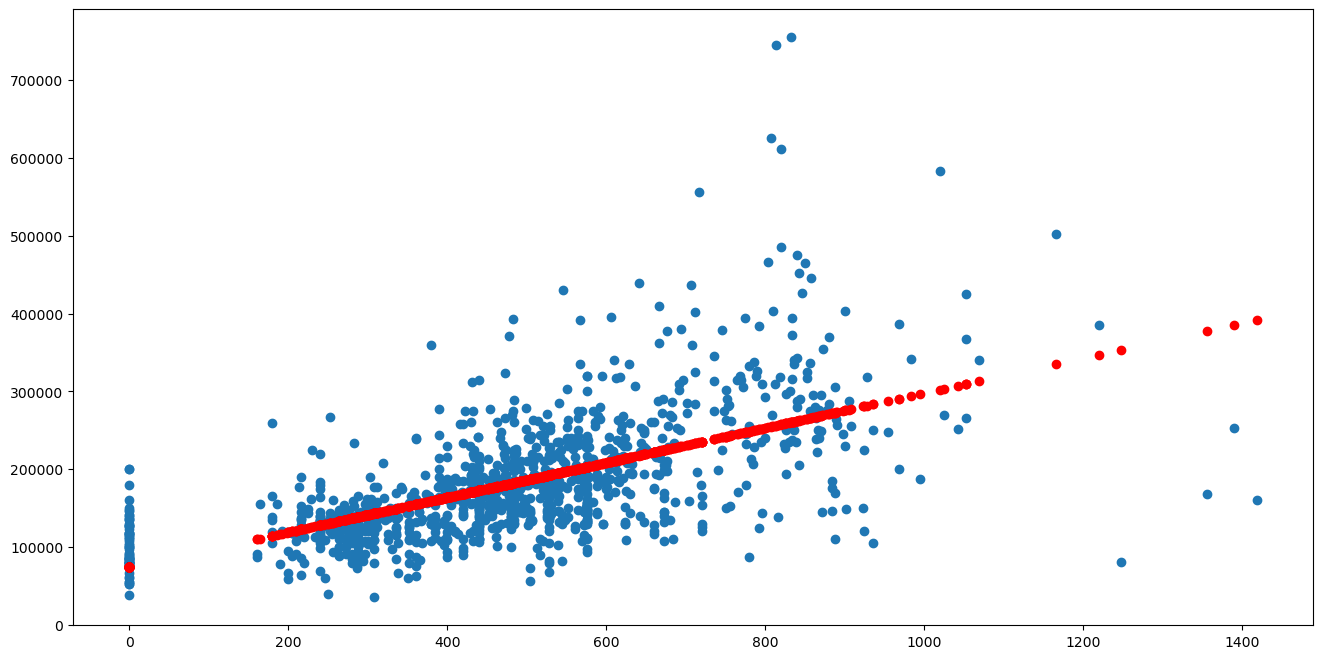

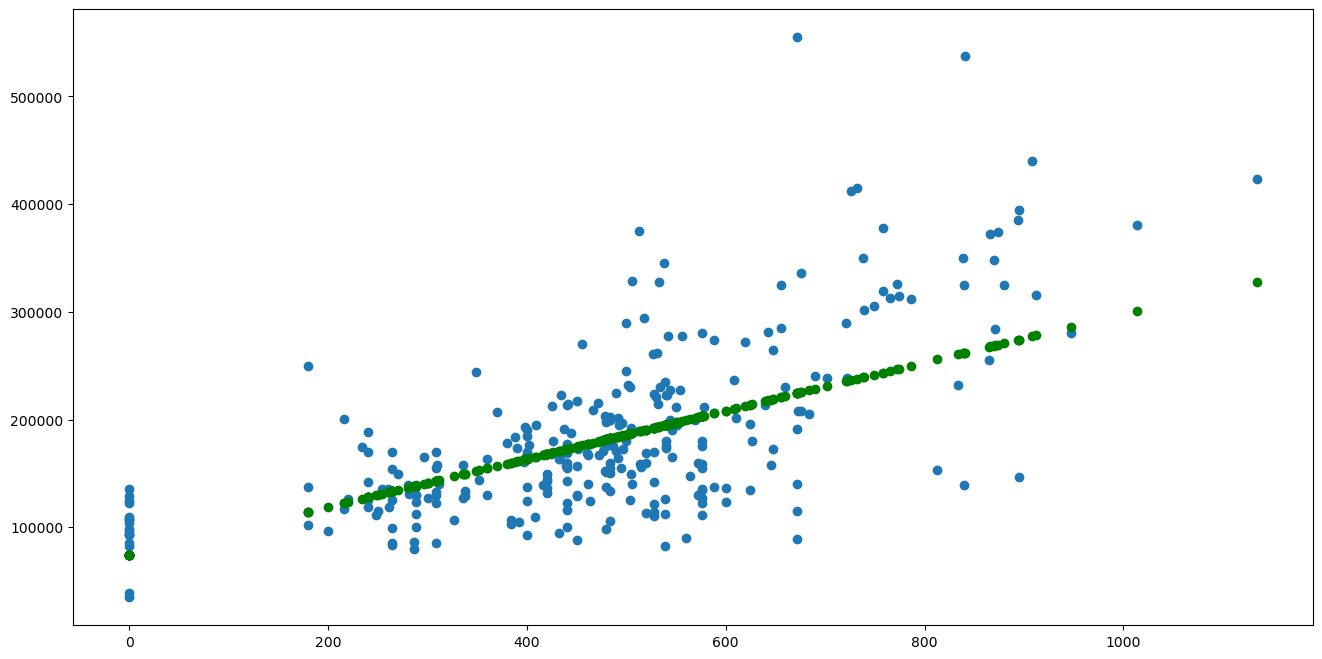

Goodness of fit of the model
train data
Explained Variance (R^2) 	: 0.37422272860707473
Mean Squared Error (MSE) 	: 3907679846.998798
Root Mean Squared Error (RMSE) 	: 62511.43772941715
test data
Explained Variance (R^2) 	: 0.43934927985318784
Mean Squared Error (MSE) 	: 3666683116.275816
Root Mean Squared Error (RMSE) 	: 60553.142909974675


In [5]:
compare('GarageArea', 'SalePrice' , housedata)

Ways to determine better model based on Goodness of fit of the model:
higher R-squared -> better fit
lower RMSE
lower MAE

'GrLivArea'
train data
Explained Variance (R^2) 	: 0.5193620992030163 
Mean Squared Error (MSE) 	: 3104514234.2443542
Root Mean Squared Error (RMSE) 	: 55718.16790100294
test data
Explained Variance (R^2) 	: 0.4235723124264984
Mean Squared Error (MSE) 	: 3283903420.1812167
Root Mean Squared Error (RMSE) 	: 57305.352456652916

'TotalBsmtSF'
train data 
Explained Variance (R^2) 	: 0.3742371009449613
Mean Squared Error (MSE) 	: 4176782397.4854937
Root Mean Squared Error (RMSE) 	: 64628.03105066325
test data
Explained Variance (R^2) 	: 0.38043427386787343
Mean Squared Error (MSE) 	: 2965247214.2769895
Root Mean Squared Error (RMSE) 	: 54454.08354087864

'GarageArea'
train data
Explained Variance (R^2) 	: 0.37249477979145407
Mean Squared Error (MSE) 	: 4094842447.7146564
Root Mean Squared Error (RMSE) 	: 63990.95598375333
test data
Explained Variance (R^2) 	: 0.45655425105137426
Mean Squared Error (MSE) 	: 2901487023.694223
Root Mean Squared Error (RMSE) 	: 53865.45297028721

GrLivArea has the highest R-squared value, lowest root mean squared error(RMSE) and mean squared erro(MSE)
Hence GrLivArea is the better model out of the 3

# Problem 3 : Refining the Models to Predict SalePrice
In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on 

the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.

Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

In [24]:
p3=housedata[['SalePrice', 'GrLivArea']]

<Axes: >

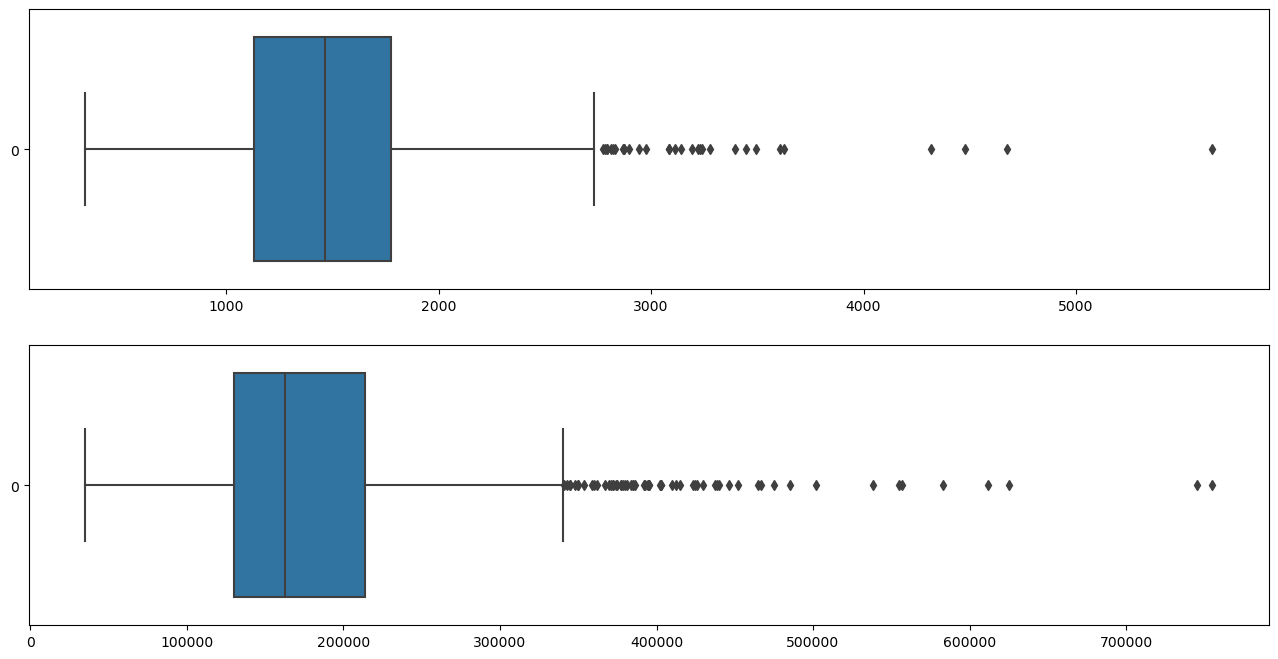

In [25]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(data = p3["GrLivArea"], orient = "h", ax = axes[0])
sb.boxplot(data = p3["SalePrice"], orient = "h", ax = axes[1])

In [26]:
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    count = ( ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr) ))).sum()
    print(count)
    return df_out

In [27]:
df=remove_outliers(p3)
df.head()

SalePrice    61
GrLivArea    31
dtype: int64


,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


<Axes: >

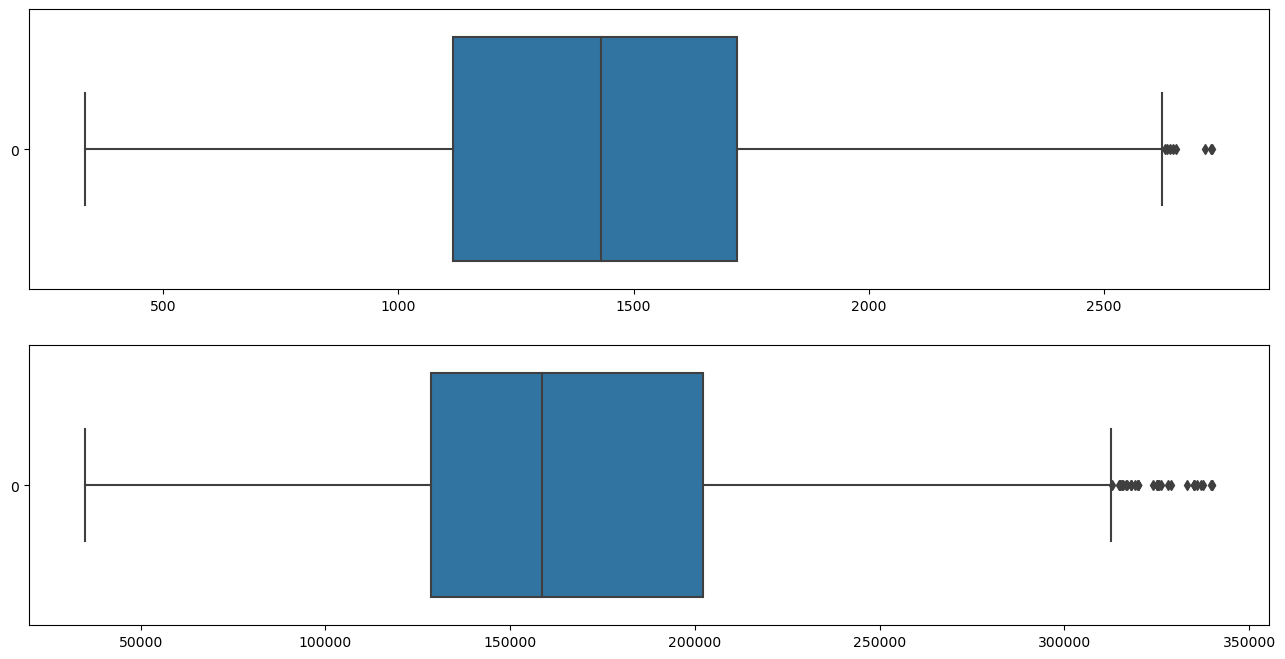

In [28]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(data = df["GrLivArea"], orient = "h", ax = axes[0])
sb.boxplot(data = df["SalePrice"], orient = "h", ax = axes[1])

In [18]:
q1=housedata[['SalePrice']].quantile(0.25)
q3=housedata[['SalePrice']].quantile(0.75)
iqr=q3-q1

upperlimit=q3 +1.5*iqr
lowerlimit=q1-1.5*iqr

housedata[housedata['SalePrice']]>upperlimit
housedata[housedata['SalePrice']]<lowerlimit

newdf=housedata[housedata[['SalePrice']]<upperlimit & housedata[['SalePrice']]>lowerlimit]

KeyError: "None of [Index([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900,\n       118000,\n       ...\n       136000, 287090, 145000,  84500, 185000, 175000, 210000, 266500, 142125,\n       147500],\n      dtype='int64', length=1460)] are in the [columns]"

In [15]:
def findoutlier(x, housedata):
    
    q1=housedata[[x]].quantile(0.25)
    q3=housedata[[x]].quantile(0.75)
    iqr=q3-q1
    
    upperlimit=q3 +1.5*iqr
    lowerlimit=q1-1.5*iqr
    
    housedata[housedata[[x]]]>upperlimit
    housedata[housedata[[x]]]<lowerlimit
    
    newdf=housedata[housedata[[x]]<upperlimit & housedata[[x]]>lowerlimit]
    return newdf

In [16]:
saleprice=findoutlier('SalePrice', housedata)


ValueError: Boolean array expected for the condition, not int64

In [66]:
q1=housedata[['SalePrice']].quantile(0.25)
q3=housedata[['SalePrice']].quantile(0.75)
iqr=q3-q1
o1=np.where((housedata[['SalePrice']] < q1-1.5*iqr) | (housedata[['SalePrice']] > q3+1.5*iqr))
print(((housedata[['SalePrice']] < q1-1.5*iqr) | (housedata[['SalePrice']] > q3+1.5*iqr)).sum())
print(o1)
q1=housedata[['GrLivArea']].quantile(0.25)
q3=housedata[['GrLivArea']].quantile(0.75)
iqr=q3-q1
o2=np.where((housedata[['GrLivArea']] < q1-1.5*iqr) | (housedata[['GrLivArea']] > q3+1.5*iqr))
print(o2)
outliers=np.concatenate((o1,o2), axis=1)
print(outliers)


SalePrice    61
dtype: int64
(array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
        309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
        481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
        664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
        877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
       1267, 1268, 1353, 1373, 1388, 1437], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))
(array([  58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
        635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
       1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0

In [53]:
saleprice=housedata[['SalePrice']]
grlivarea=housedata[['GrLivArea']]
for x in o1!=0:
    saleprice.drop(x.index, inplace=True)
for y in o2:
    grlivarea.drop(x.index, inplace=True)
housedata

TypeError: 'bool' object is not iterable